In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm

In [5]:
# Pubmed 5년 : 2023, 2022, 2021, 2020, 2019
https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2023-2023
https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2023-2023&page=2
https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2023-2023&page=3
...
https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2023-2023&page=772


https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2022-2022
https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2022-2022&page=2
https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2022-2022&page=3
...
https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2022-2022&page=1000


https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2021-2021
https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2021-2021&page=2
...
https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2021-2021&page=1000


https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2020-2020
https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2020-2020&page=2
...
https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2020-2020&page=1000


https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2019-2019
https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2019-2019&page=2
...
https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2019-2019&page=1000



SyntaxError: invalid syntax (3169651662.py, line 2)

In [6]:
# 데이터 크롤링
response = requests.get(
    'https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2023-2023'
    )
bs = BeautifulSoup(response.text, 'lxml')

In [7]:
bs

<!DOCTYPE html>
<html lang="en">
<head itemscope="" itemtype="http://schema.org/WebPage" prefix="og: http://ogp.me/ns#">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!-- Mobile properties -->
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://cdn.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/bfe6f256-a165-45f6-b3d4-5fc63d88f6ff/CACHE/css/output.e3e95ed4a5de.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/bfe6f256-a165-45f6-b3d4-5fc63d88f6ff/CACHE/css/output.452c70ce66f7.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/bfe6f256-a165-45f6-b3d4-5fc63d88f6ff/CACHE/css/output.dc65705de2

In [8]:
# Paper title
# X-Path : /html/body/main/div[9]/div[2]/section[1]/div[1]/div/article[1]/div[2]/div[1]/a
title_raw_data = bs.select('body main div div section div div article div div a')
titles = [bs.select('body main div div section div div article div div a')[i].text.strip().lower() for i in range(len(title_raw_data))]
titles

['development of bioinformatics and multi-omics analyses in organoids.',
 'deep learning in bioinformatics and biomedicine.',
 'overview of bioinformatics software and databases for metabolic engineering.',
 "a clinician's guide to bioinformatics for next-generation sequencing.",
 'bioinformatics analysis and function prediction of nbs-lrr gene family in broussonetia papyrifera.',
 'bioinformatics and computational analyses of kidney stone modulatory proteins lead to solid experimental evidence and therapeutic potential.',
 'bioinformatics analysis of mirna sequencing data.',
 'rabc: rheumatoid arthritis bioinformatics center.',
 'potential mechanisms between hf and copd: new insights from bioinformatics.',
 'the bioinformatics of aptamers: ht-selex analysis with aptasuite.']

In [9]:
import re
# Paper date
# X-Path : /html/body/main/div[9]/div[2]/section[1]/div[1]/div/article[1]/div[2]/div[1]/div[1]/span[3]
# date_raw_data = bs.select('body main div div section div div article div div div span')
# date_raw_data = bs.select('body main div div section div div article div div div span')[2].text
date_raw_data = bs.findAll('span', {"class" : "docsum-journal-citation short-journal-citation"})
date_raw_data
dates = [re.compile("[0-9]+").findall(str(date_raw_data[i]))[0] for i in range(len(date_raw_data))]
dates

['2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023',
 '2023']

In [10]:
nrg_jc = pd.DataFrame({
    'title' : titles,
    'date' : dates
})

In [11]:
nrg_jc

,title,date
0,development of bioinformatics and multi-omics ...,2023
1,deep learning in bioinformatics and biomedicine.,2023
2,overview of bioinformatics software and databa...,2023
3,a clinician's guide to bioinformatics for next...,2023
4,bioinformatics analysis and function predictio...,2023
5,bioinformatics and computational analyses of k...,2023
6,bioinformatics analysis of mirna sequencing data.,2023
7,rabc: rheumatoid arthritis bioinformatics center.,2023
8,potential mechanisms between hf and copd: new ...,2023
9,the bioinformatics of aptamers: ht-selex analy...,2023


In [12]:
import numpy as np
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image

In [13]:
import re

In [14]:
splitted_titles = [re.split('\s', title) for title in titles]
splitted_titles

[['development',
  'of',
  'bioinformatics',
  'and',
  'multi-omics',
  'analyses',
  'in',
  'organoids.'],
 ['deep', 'learning', 'in', 'bioinformatics', 'and', 'biomedicine.'],
 ['overview',
  'of',
  'bioinformatics',
  'software',
  'and',
  'databases',
  'for',
  'metabolic',
  'engineering.'],
 ['a',
  "clinician's",
  'guide',
  'to',
  'bioinformatics',
  'for',
  'next-generation',
  'sequencing.'],
 ['bioinformatics',
  'analysis',
  'and',
  'function',
  'prediction',
  'of',
  'nbs-lrr',
  'gene',
  'family',
  'in',
  'broussonetia',
  'papyrifera.'],
 ['bioinformatics',
  'and',
  'computational',
  'analyses',
  'of',
  'kidney',
  'stone',
  'modulatory',
  'proteins',
  'lead',
  'to',
  'solid',
  'experimental',
  'evidence',
  'and',
  'therapeutic',
  'potential.'],
 ['bioinformatics', 'analysis', 'of', 'mirna', 'sequencing', 'data.'],
 ['rabc:', 'rheumatoid', 'arthritis', 'bioinformatics', 'center.'],
 ['potential',
  'mechanisms',
  'between',
  'hf',
  'and',

In [15]:
import itertools

In [16]:
title_words = list(itertools.chain(*splitted_titles))
title_words

['development',
 'of',
 'bioinformatics',
 'and',
 'multi-omics',
 'analyses',
 'in',
 'organoids.',
 'deep',
 'learning',
 'in',
 'bioinformatics',
 'and',
 'biomedicine.',
 'overview',
 'of',
 'bioinformatics',
 'software',
 'and',
 'databases',
 'for',
 'metabolic',
 'engineering.',
 'a',
 "clinician's",
 'guide',
 'to',
 'bioinformatics',
 'for',
 'next-generation',
 'sequencing.',
 'bioinformatics',
 'analysis',
 'and',
 'function',
 'prediction',
 'of',
 'nbs-lrr',
 'gene',
 'family',
 'in',
 'broussonetia',
 'papyrifera.',
 'bioinformatics',
 'and',
 'computational',
 'analyses',
 'of',
 'kidney',
 'stone',
 'modulatory',
 'proteins',
 'lead',
 'to',
 'solid',
 'experimental',
 'evidence',
 'and',
 'therapeutic',
 'potential.',
 'bioinformatics',
 'analysis',
 'of',
 'mirna',
 'sequencing',
 'data.',
 'rabc:',
 'rheumatoid',
 'arthritis',
 'bioinformatics',
 'center.',
 'potential',
 'mechanisms',
 'between',
 'hf',
 'and',
 'copd:',
 'new',
 'insights',
 'from',
 'bioinformatic

In [17]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

In [18]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize, WordPunctTokenizer, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag

In [19]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\최예름\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\최예름\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [72]:
nltk.download('popular')
#nltk.word_tokenizer
#nltk.pos_tag

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\최예름\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\최예름\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\최예름\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\최예름\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\최예름\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\

True

In [20]:
import nltk
title_words_wordtype = nltk.pos_tag(title_words)
title_words_wordtype

[('development', 'NN'),
 ('of', 'IN'),
 ('bioinformatics', 'NNS'),
 ('and', 'CC'),
 ('multi-omics', 'NNS'),
 ('analyses', 'NNS'),
 ('in', 'IN'),
 ('organoids.', 'JJ'),
 ('deep', 'JJ'),
 ('learning', 'NN'),
 ('in', 'IN'),
 ('bioinformatics', 'NNS'),
 ('and', 'CC'),
 ('biomedicine.', 'JJ'),
 ('overview', 'NN'),
 ('of', 'IN'),
 ('bioinformatics', 'NNS'),
 ('software', 'NN'),
 ('and', 'CC'),
 ('databases', 'NNS'),
 ('for', 'IN'),
 ('metabolic', 'JJ'),
 ('engineering.', 'FW'),
 ('a', 'DT'),
 ("clinician's", 'NN'),
 ('guide', 'NN'),
 ('to', 'TO'),
 ('bioinformatics', 'NNS'),
 ('for', 'IN'),
 ('next-generation', 'NN'),
 ('sequencing.', 'NN'),
 ('bioinformatics', 'NNS'),
 ('analysis', 'NN'),
 ('and', 'CC'),
 ('function', 'NN'),
 ('prediction', 'NN'),
 ('of', 'IN'),
 ('nbs-lrr', 'JJ'),
 ('gene', 'NN'),
 ('family', 'NN'),
 ('in', 'IN'),
 ('broussonetia', 'NN'),
 ('papyrifera.', 'NN'),
 ('bioinformatics', 'NNS'),
 ('and', 'CC'),
 ('computational', 'JJ'),
 ('analyses', 'NNS'),
 ('of', 'IN'),
 ('ki

In [21]:
word_list = [title_words_wordtype[i][0] for i in range(len(title_words_wordtype)) if title_words_wordtype[i][1].startswith('N') or title_words_wordtype[i][1].startswith('J')]
word_list

['development',
 'bioinformatics',
 'multi-omics',
 'analyses',
 'organoids.',
 'deep',
 'learning',
 'bioinformatics',
 'biomedicine.',
 'overview',
 'bioinformatics',
 'software',
 'databases',
 'metabolic',
 "clinician's",
 'guide',
 'bioinformatics',
 'next-generation',
 'sequencing.',
 'bioinformatics',
 'analysis',
 'function',
 'prediction',
 'nbs-lrr',
 'gene',
 'family',
 'broussonetia',
 'papyrifera.',
 'bioinformatics',
 'computational',
 'analyses',
 'kidney',
 'stone',
 'modulatory',
 'proteins',
 'solid',
 'experimental',
 'evidence',
 'therapeutic',
 'potential.',
 'bioinformatics',
 'analysis',
 'mirna',
 'data.',
 'rabc:',
 'rheumatoid',
 'arthritis',
 'bioinformatics',
 'potential',
 'mechanisms',
 'hf',
 'new',
 'insights',
 'bioinformatics',
 'aptamers:',
 'ht-selex',
 'analysis',
 'aptasuite.']

In [203]:
remove_words = ['soft', 'sweeps:', 'rapid', 'adaptation',  'regulatory', 'promoter',
'architectures', 'thermodynamic', 'modelling', 'chromatin', 'organization',
'red', 'triangles', '3d', 'genome', 'biology', 'stem', 'cell-derived', 'organoid',
'hayflick', 'limit', 'maternal', 'germline', 'down', 'memory', 'lane',
'gene', 'regulation', 'evidence', 'evolutionary', 'forces', 'mutation', 'rate', 
'trait', 'gene', 'variant', 'genomes', 'project', 'dynamic', 'control',
'meiotic', 'recombination', 'stochastic', 'transitions', 'cancer', 'heterogeneity',
'hidden', 'buffering', 'intestinal', 'cell', 'fate', 'gene', 'regulation',
'clinical', 'manifestation', 'complex', 'traits', 'autoimmune', 'disease', 'genetics',
'retrotransposons:', 'prosper:', '—', 'models:', 'what’s', 
'hi-c', 'latinxs']
for remove_word in remove_words:
    try:
        word_list.remove(remove_word)
    except ValueError:
        pass
append_words = ['soft sweeps', 'rapid adaptation', 'regulatory promoter architectures',
                'thermodynamic modelling', 'chromatin organization',
                'red triangles', '3d genome biology', 'stem cell-derived organoid',
                'hayflick limit', 'maternal germline', 'down memory lane', 
                'gene regulation', 'evidence of evolutionary forces', 
                'mutation rate', 'evolving trait', 'gene variant', 
                '1000 genomes project', 'dynamic control', 'meiotic recombination',
                'stochastic transitions', 'cancer heterogeneity', 'hidden buffering', 
                'intestinal cell fate', 'gene regulation', 'clinical manifestation',
                'complex traits', 'autoimmune disease genetics', 'retrotransposons',
                'prosper', 'models', 'Hi-C', 'Latinxs']

try:
    word_list.extend(append_words)
except ValueError:
    pass


In [22]:
word_list

['development',
 'bioinformatics',
 'multi-omics',
 'analyses',
 'organoids.',
 'deep',
 'learning',
 'bioinformatics',
 'biomedicine.',
 'overview',
 'bioinformatics',
 'software',
 'databases',
 'metabolic',
 "clinician's",
 'guide',
 'bioinformatics',
 'next-generation',
 'sequencing.',
 'bioinformatics',
 'analysis',
 'function',
 'prediction',
 'nbs-lrr',
 'gene',
 'family',
 'broussonetia',
 'papyrifera.',
 'bioinformatics',
 'computational',
 'analyses',
 'kidney',
 'stone',
 'modulatory',
 'proteins',
 'solid',
 'experimental',
 'evidence',
 'therapeutic',
 'potential.',
 'bioinformatics',
 'analysis',
 'mirna',
 'data.',
 'rabc:',
 'rheumatoid',
 'arthritis',
 'bioinformatics',
 'potential',
 'mechanisms',
 'hf',
 'new',
 'insights',
 'bioinformatics',
 'aptamers:',
 'ht-selex',
 'analysis',
 'aptasuite.']

(-0.5, 399.5, 199.5, -0.5)

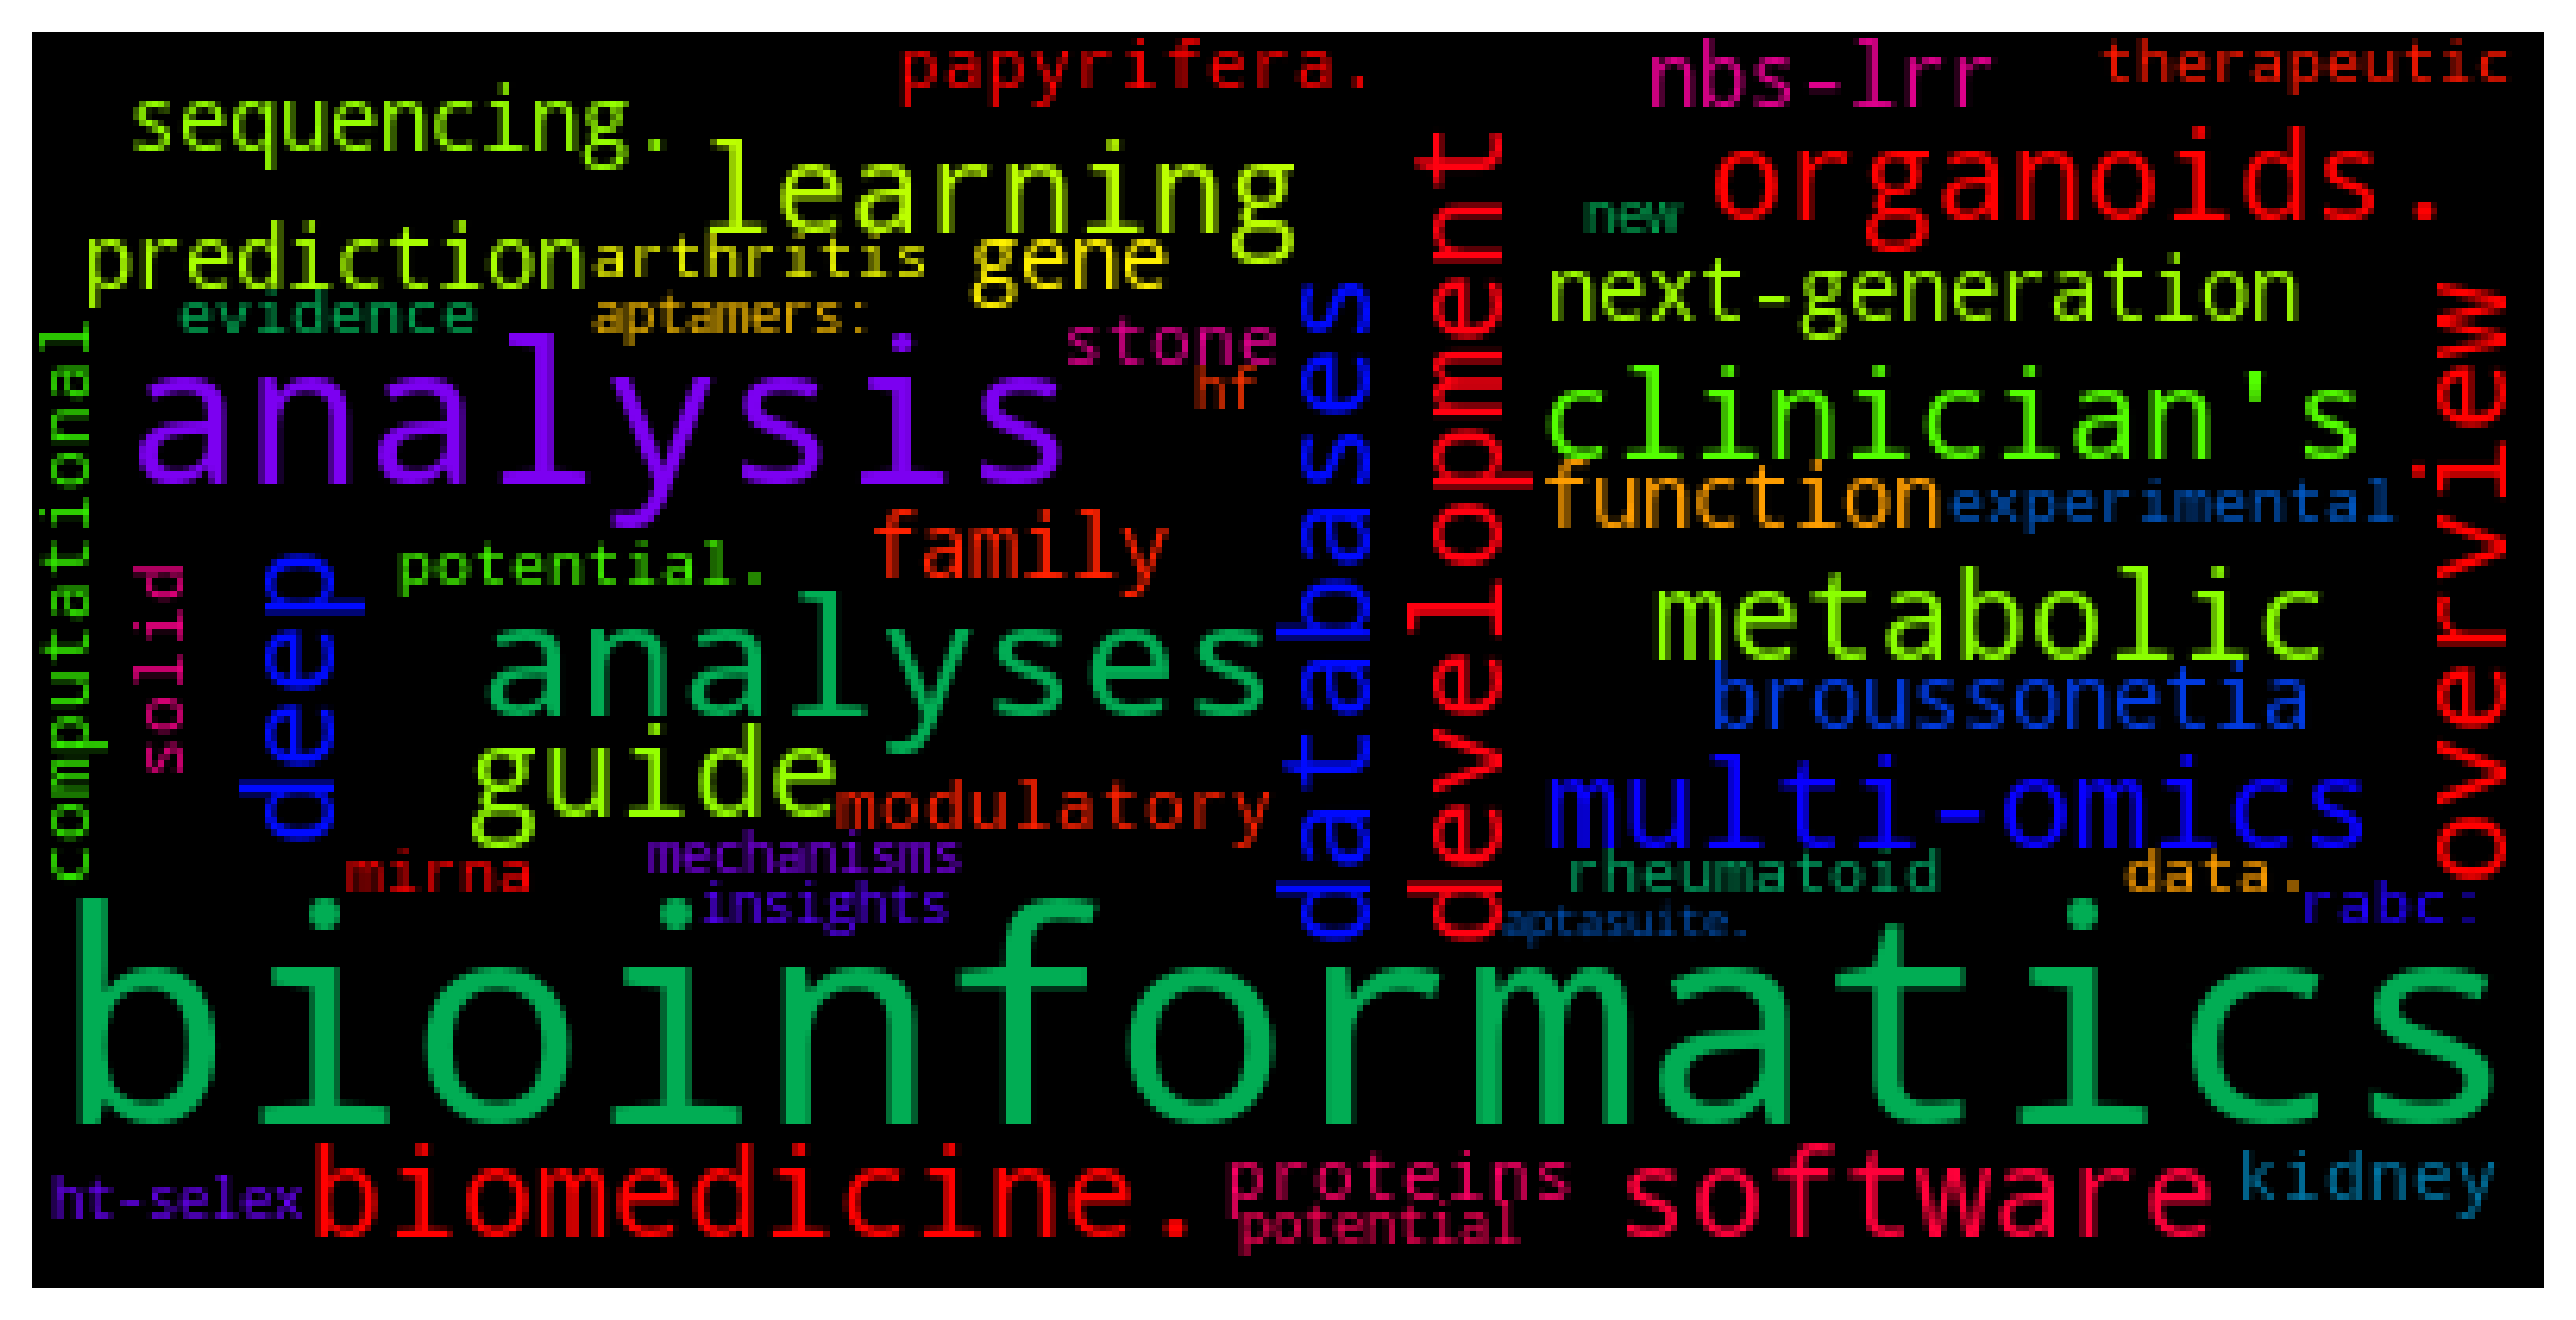

In [23]:
counter = Counter(word_list)

word_cloud = WordCloud(
    background_color="black", 
    max_font_size=50,
    colormap='prism'
    ).generate_from_frequencies(counter)

plt.figure(figsize=(10, 8), dpi=(1000))
plt.imshow(word_cloud)
plt.axis('off')

In [24]:
# 데이터 크롤링
response = requests.get(
    'https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2023-2023'
    )
bs = BeautifulSoup(response.text, 'lxml')

In [45]:
# last_page_num = int(bs.select('body main div div div div div form')[0].text.strip())
last_page_num = bs.select('body main div div div div div form input')
last_page_num[0].attrs.get('max')

'772'

In [ ]:
https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2023-2023
https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2023-2023&page=2
https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2023-2023&page=3
...
https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2023-2023&page=772
# 해당 날짜 모든 데이터 크롤링
url = 'https://news.naver.com/main/list.naver?mode=LPOD&mid=sec&oid=023&date=20221126&page=100000'
bs = bs_object_from_url(url)

# 2023

In [65]:
# 함수화
def bs_object_from_url(url):
    response = requests.get(url)
    bs = BeautifulSoup(response.text, 'lxml')
    return bs

# get last page num
last_page_num = int(bs.select('body main div div div div div form input')[0].attrs.get('max'))

research_data_2023 = pd.DataFrame()

for page in tqdm(range(1, last_page_num + 1)):
    url = f'https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2023-2023&page={page}'
    bs_page = bs_object_from_url(url)

    title_raw_data = bs_page.select('body main div div section div div article div div a')
    titles = [bs_page.select('body main div div section div div article div div a')[i].text.strip().lower() for i in range(len(title_raw_data))]
    date_raw_data = bs_page.findAll('span', {"class" : "docsum-journal-citation short-journal-citation"})
    dates = [re.compile("[0-9]+").findall(str(date_raw_data[i]))[0] for i in range(len(date_raw_data))]

    pubmed_df_2023 = pd.DataFrame({
        'title' : titles,
        'date' : dates
    })

    research_data_2023 = research_data_2023.append(pubmed_df_2023)

  0%|          | 0/772 [00:00<?, ?it/s]C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19376\1503251310.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  research_data_2023 = research_data_2023.append(pubmed_df_2023)
  0%|          | 3/772 [00:03<12:41,  1.01it/s]C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19376\1503251310.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  research_data_2023 = research_data_2023.append(pubmed_df_2023)
  1%|          | 4/772 [00:04<13:25,  1.05s/it]C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19376\1503251310.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  research_data_2023 = research_data_2023.append(pubmed_df_2023)
  1%|          | 5/772 [00:05<14:

In [66]:
research_data_2023

,title,date
0,development of bioinformatics and multi-omics ...,2023
1,deep learning in bioinformatics and biomedicine.,2023
2,overview of bioinformatics software and databa...,2023
3,a clinician's guide to bioinformatics for next...,2023
4,bioinformatics analysis and function predictio...,2023
...,...,...
9,author correction: the evolutionary history of...,2023
0,"identification of novel, replicable genetic ri...",2023
1,a 12-gene pharmacogenetic panel to prevent adv...,2023
2,gestational age at birth and body size from in...,2023


# 2022

In [67]:
# 함수화
def bs_object_from_url(url):
    response = requests.get(url)
    bs = BeautifulSoup(response.text, 'lxml')
    return bs

# get last page num
last_page_num = 1000

research_data_2022 = pd.DataFrame()

for page in tqdm(range(1, last_page_num + 1)):
    url = f'https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2022-2022&page={page}'
    bs_page = bs_object_from_url(url)

    title_raw_data = bs_page.select('body main div div section div div article div div a')
    titles = [bs_page.select('body main div div section div div article div div a')[i].text.strip().lower() for i in range(len(title_raw_data))]
    date_raw_data = bs_page.findAll('span', {"class" : "docsum-journal-citation short-journal-citation"})
    dates = [re.compile("[0-9]+").findall(str(date_raw_data[i]))[0] for i in range(len(date_raw_data))]

    pubmed_df_2022 = pd.DataFrame({
        'title' : titles,
        'date' : dates
    })

    research_data_2022 = research_data_2022.append(pubmed_df_2022)

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19376\2745201575.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  research_data_2022 = research_data_2022.append(pubmed_df_2022)
  0%|          | 3/1000 [00:04<21:22,  1.29s/it]C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19376\2745201575.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  research_data_2022 = research_data_2022.append(pubmed_df_2022)
  0%|          | 4/1000 [00:05<22:09,  1.33s/it]C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19376\2745201575.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  research_data_2022 = research_data_2022.append(pubmed_df_2022)
  0%|          | 5/1000 [00:06

In [68]:
research_data_2022

,title,date
0,bioinformatics-led discovery of osteoarthritis...,2022
1,microrna bioinformatics.,2022
2,protein structural bioinformatics: an overview.,2022
3,bioinformatics workflows for clinical applicat...,2022
4,identification of prognostic genes in the panc...,2022
...,...,...
5,genomics divergence of lactococcus lactis subs...,2022
6,perspectives and preferences regarding genomic...,2022
7,glyco-decipher enables glycan database-indepen...,2022
8,glycopeptide antibiotic discovery in the genom...,2022


# 2021

In [69]:
# 함수화
def bs_object_from_url(url):
    response = requests.get(url)
    bs = BeautifulSoup(response.text, 'lxml')
    return bs

# get last page num
last_page_num = 1000

research_data_2021 = pd.DataFrame()

for page in tqdm(range(1, last_page_num + 1)):
    url = f'https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2021-2021&page={page}'
    bs_page = bs_object_from_url(url)

    title_raw_data = bs_page.select('body main div div section div div article div div a')
    titles = [bs_page.select('body main div div section div div article div div a')[i].text.strip().lower() for i in range(len(title_raw_data))]
    date_raw_data = bs_page.findAll('span', {"class" : "docsum-journal-citation short-journal-citation"})
    dates = [re.compile("[0-9]+").findall(str(date_raw_data[i]))[0] for i in range(len(date_raw_data))]

    pubmed_df_2021 = pd.DataFrame({
        'title' : titles,
        'date' : dates
    })

    research_data_2021 = research_data_2021.append(pubmed_df_2021)

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19376\908730861.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  research_data_2021 = research_data_2021.append(pubmed_df_2021)
  0%|          | 3/1000 [00:03<19:26,  1.17s/it]C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19376\908730861.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  research_data_2021 = research_data_2021.append(pubmed_df_2021)
  0%|          | 4/1000 [00:04<19:52,  1.20s/it]C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19376\908730861.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  research_data_2021 = research_data_2021.append(pubmed_df_2021)
  0%|          | 5/1000 [00:05<19

In [70]:
research_data_2021  # 2022년이 나오는 경우는 뭐지? 이유 찾기

,title,date
0,the bioinformatics toolbox for circrna discove...,2021
1,venn diagrams in bioinformatics.,2021
2,"is ""bioinformatics"" dead?",2021
3,arabidopsis bioinformatics: tools and strategies.,2021
4,bioinformatics workflows for clinical applicat...,2022
...,...,...
5,the dimer-monomer equilibrium of sars-cov-2 ma...,2021
6,mapping major sars-cov-2 drug targets and asse...,2021
7,the genomic basis of army ant chemosensory ada...,2021
8,enriched environment regulates dendritic cells...,2021


# 2020

In [72]:
# 함수화
def bs_object_from_url(url):
    response = requests.get(url)
    bs = BeautifulSoup(response.text, 'lxml')
    return bs

# get last page num
last_page_num = 1000

research_data_2020 = pd.DataFrame()

for page in tqdm(range(1, last_page_num + 1)):
    url = f'https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2020-2020&page={page}'
    bs_page = bs_object_from_url(url)

    title_raw_data = bs_page.select('body main div div section div div article div div a')
    titles = [bs_page.select('body main div div section div div article div div a')[i].text.strip().lower() for i in range(len(title_raw_data))]
    date_raw_data = bs_page.findAll('span', {"class" : "docsum-journal-citation short-journal-citation"})
    dates = [re.compile("[0-9]+").findall(str(date_raw_data[i]))[0] for i in range(len(date_raw_data))]

    pubmed_df_2020 = pd.DataFrame({
        'title' : titles,
        'date' : dates
    })

    research_data_2020 = research_data_2020.append(pubmed_df_2020)

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19376\836699051.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  research_data_2020 = research_data_2020.append(pubmed_df_2020)
  0%|          | 3/1000 [00:05<29:21,  1.77s/it]C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19376\836699051.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  research_data_2020 = research_data_2020.append(pubmed_df_2020)
  0%|          | 4/1000 [00:07<29:44,  1.79s/it]C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19376\836699051.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  research_data_2020 = research_data_2020.append(pubmed_df_2020)
  0%|          | 5/1000 [00:08<28

In [73]:
research_data_2020  # 2021년이 나오는 경우는 뭐지? 이유 찾기

,title,date
0,crispr-cas bioinformatics.,2020
1,bioinformatics methods for mass spectrometry-b...,2020
2,bioinformatics approaches for anti-cancer drug...,2020
3,current trend and development in bioinformatic...,2020
4,bioinformatics for cancer immunotherapy.,2020
...,...,...
5,evidence that the properdp method is inadequat...,2020
6,"human adaptation over the past 40,000 years.",2020
7,metabolomics: impact of comorbidities and infl...,2021
8,influence of tetraconazole on the proteome pro...,2020


# 2019

In [75]:
# 함수화
def bs_object_from_url(url):
    response = requests.get(url)
    bs = BeautifulSoup(response.text, 'lxml')
    return bs

# get last page num
last_page_num = 1000

research_data_2019 = pd.DataFrame()

for page in tqdm(range(1, last_page_num + 1)):
    url = f'https://pubmed.ncbi.nlm.nih.gov/?term=bioinformatics&filter=years.2019-2019&page={page}'
    bs_page = bs_object_from_url(url)

    title_raw_data = bs_page.select('body main div div section div div article div div a')
    titles = [bs_page.select('body main div div section div div article div div a')[i].text.strip().lower() for i in range(len(title_raw_data))]
    date_raw_data = bs_page.findAll('span', {"class" : "docsum-journal-citation short-journal-citation"})
    dates = [re.compile("[0-9]+").findall(str(date_raw_data[i]))[0] for i in range(len(date_raw_data))]

    pubmed_df_2019 = pd.DataFrame({
        'title' : titles,
        'date' : dates
    })

    research_data_2019 = research_data_2019.append(pubmed_df_2019)

  0%|          | 0/1000 [00:00<?, ?it/s]C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19376\3784693328.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  research_data_2019 = research_data_2019.append(pubmed_df_2019)
  0%|          | 3/1000 [00:06<36:08,  2.18s/it]C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19376\3784693328.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  research_data_2019 = research_data_2019.append(pubmed_df_2019)
  0%|          | 4/1000 [00:08<35:54,  2.16s/it]C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19376\3784693328.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  research_data_2019 = research_data_2019.append(pubmed_df_2019)
  0%|          | 5/1000 [00:10

In [76]:
research_data_2019  # 2020년이 나오는 경우는 뭐지? 이유 찾기

,title,date
0,crispr-cas bioinformatics.,2020
1,a brief history of bioinformatics.,2019
2,trends in the development of mirna bioinformat...,2019
3,metabolomics technology and bioinformatics for...,2019
4,bioinformatics analysis of whole exome sequenc...,2019
...,...,...
5,noninvasive profiling of sweat-derived lipid m...,2019
6,"rare, functional, somatic variants in gene fam...",2019
7,causal effects of serum metabolites on amyotro...,2020
8,battle of epigenetic proportions: comparing il...,2020


# 단어 combine

# Word cloud 연도별 출력

### 2023

### 2022

### 2021

### 2020

### 2019

In [ ]:
# 특정 단어 연관분석 (수식어, 명사)
# 단어 combine 하기